In [233]:
import pandas as pd


In [234]:
df = pd.read_csv("MorningTest2.csv")[['price']]
print(len(df))

14700


Calculate macd and signal lines

In [235]:
exp1 = df#df.ewm(span=2, adjust=False).mean() #12
exp2 = df.ewm(span=10, adjust=False).mean() #15
macd = exp1-exp2
signal = macd.ewm(span=2, adjust=False).mean() #2

In [236]:
# Function to test the crossover driven profits of the macd and signal lines
def mac_daddy_tester(macd, signal):
    bought = False
    sumwin = 0
    transactions = []
    for i in range(1, len(df)):
        if ( (macd.iat[i, 0] > signal.iat[i, 0]) and (macd.iat[i-1, 0] <= signal.iat[i-1, 0]) and bought == False):
            # print("Crossed above, time to buy", i)
            bought = df.iat[i,0]
        if ( (macd.iat[i, 0] < signal.iat[i, 0]) and (macd.iat[i-1, 0] >= signal.iat[i-1, 0]) and bought):
            # print("Crossed below, time to sell", i)
            # print("Bought at\t", bought, " selling at\t", df.iat[i,0], "for profit:\t", df.iat[i,0] - bought)
            transactions.append(df.iat[i,0] - bought)
            sumwin = sumwin + df.iat[i,0] - bought
            bought = False
    return(sumwin, transactions)

In [237]:
profit, transactions = mac_daddy_tester(macd, signal)
print("Profit: ", profit)

Profit:  140.45303099999933


Transactions:  2715
Average:  0.051732239779005276
Median:  -0.0500000000001819


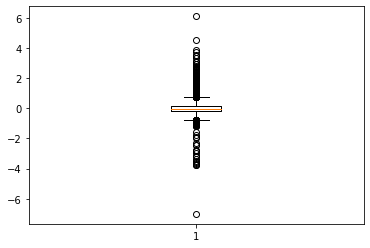

In [238]:
import statistics
import matplotlib.pyplot as plt

print("Transactions: ", len(transactions))
print("Average: ", statistics.mean(transactions))
print("Median: ", statistics.median(transactions))
plt.boxplot(transactions)
plt.show()
# transactions.sort()
# print(transactions)